# **Laboratorijska vježba 5**: Zadaci za samostalni rad

## **Predviđanje prodaje iz troškova oglasa**

U ovoj laboratorijskoj vježbi istražit ćemo skup podataka koji sadrži informacije o oglasima u kojima se prodaju određeni proizvodi, a objavljuju se na medijima poput TV-a, radija i novina. Skup podataka sadrži sljedeće stupce:

* TV - cijena za oglašavanje na TV-u za jedan proizvod na određenom tržištu (u tisućama dolara).
* Radio - cijena za oglašavanje na radiju za isti proizvod.
* Newspaper - cijena za oglašavanje u novinama za isti proizvod.
* Sales - prodaja jednog proizvoda na određenom tržištu (u tisućama jedinica).



In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import math
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error

In [ ]:
data = pd.read_csv('data/Advertising.csv', index_col=0)
data.head()
data

TV  radio  newspaper  sales
1    230.1   37.8       69.2   22.1
2     44.5   39.3       45.1   10.4
3     17.2   45.9       69.3    9.3
4    151.5   41.3       58.5   18.5
5    180.8   10.8       58.4   12.9
..     ...    ...        ...    ...
196   38.2    3.7       13.8    7.6
197   94.2    4.9        8.1    9.7
198  177.0    9.3        6.4   12.8
199  283.6   42.0       66.2   25.5
200  232.1    8.6        8.7   13.4

[200 rows x 4 columns]

## **Zadatak 1: Linearna regresija: predviđanje prodaje iz troškova oglasa**

Podijelite skup podataka na podskupove za trening i test. Definirajte model linearne regresije pomoću svih značajki, bez izvođenja bilo kakvih transformacija nad značajkama. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [ ]:
# Mjesto za Vaš kod
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

feature_cols = data.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sorted_inds = np.argsort(X_train['TV'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['TV'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

sorted_inds = np.argsort(X_train['radio'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['radio'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

sorted_inds = np.argsort(X_train['newspaper'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['newspaper'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

model = LinearRegression().fit(X_train, y_train)
y_train_predicted = model.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

y_test_predicted = model.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

MSE na treningu:  2.479355178905786
MSE na testu: 3.796797236715217


Ispišite jednadžbu modela koristeći izračunate koeficijente.

In [ ]:
# Mjesto za Vaš kod
for f in range(len(feature_cols)):
    print("{0} * {1} + ".format(model.coef_[f], feature_cols[f]))
print(model.intercept_)

0.044059280957465224 * TV + 
0.1992874968989395 * radio + 
0.006882452222275445 * newspaper + 
2.7089490925159065


Nacrtajte dijagram raspršenosti između stvarnih i predviđenih vrijednosti izlazne varijable za podskupove za trening i test.

In [ ]:
# Mjesto za Vaš kod
plt.scatter(y_train, y_train_predicted, c='r')
plt.scatter(y_test, y_test_predicted, c='g')

## **Zadatak 2: Nelinearna regresija: predviđanje prodaje iz troškova oglasa**

Definirajte model nelinearne (polinomijalne) regresije sa stupnjem polinoma 2, 3, 5 i 10 bez uključivanja interakcijskih članova. Koristite klasu PolynomialFeatures iz modula preprocessing iz biblioteke scikit-learn. Istrenirajte model te izračunajte MSE na podskupovima za trening i test.

In [ ]:
# Mjesto za Vaš kod
from sklearn.preprocessing import PolynomialFeatures as pf

poly_2=pf(2)
X_train_2=poly_2.fit_transform(X_train)
X_test_2=poly_2.fit_transform(X_test)

model = LinearRegression().fit(X_train_2, y_train)

y_train_predicted_2 = model.predict(X_train_2)
mse_train_2=mean_squared_error(y_train, y_train_predicted_2)
print ('MSE na treningu: ', mse_train_2)

y_test_predicted_2 = model.predict(X_test_2)
mse_test_2=mean_squared_error(y_test, y_test_predicted_2)
print('MSE na testu:', mse_test_2)

MSE na treningu:  0.35410977541934036
MSE na testu: 0.5231944949054754


In [ ]:
poly_3=pf(3)
X_train_3=poly_3.fit_transform(X_train)
X_test_3=poly_3.fit_transform(X_test)

model = LinearRegression().fit(X_train_3, y_train)

y_train_predicted_3 = model.predict(X_train_3)
mse_train_3=mean_squared_error(y_train, y_train_predicted_3)
print ('MSE na treningu: ', mse_train_3)

y_test_predicted_3 = model.predict(X_test_3)
mse_test_3=mean_squared_error(y_test, y_test_predicted_3)
print('MSE na testu:', mse_test_3)

MSE na treningu:  0.21984452631177462
MSE na testu: 0.29077449149700657


In [ ]:
poly_5=pf(5)
X_train_5=poly_5.fit_transform(X_train)
X_test_5=poly_5.fit_transform(X_test)

model = LinearRegression().fit(X_train_5, y_train)

y_train_predicted_5 = model.predict(X_train_5)
mse_train_5=mean_squared_error(y_train, y_train_predicted_5)
print ('MSE na treningu: ', mse_train_5)

y_test_predicted_5 = model.predict(X_test_5)
mse_test_5=mean_squared_error(y_test, y_test_predicted_5)
print('MSE na testu:', mse_test_5)

MSE na treningu:  0.11415367966317948
MSE na testu: 57.98431574158984


In [ ]:
poly_10=pf(10)
X_train_10=poly_10.fit_transform(X_train)
X_test_10=poly_10.fit_transform(X_test)

model = LinearRegression().fit(X_train_10, y_train)

y_train_predicted_10 = model.predict(X_train_10)
mse_train_10=mean_squared_error(y_train, y_train_predicted_10)
print ('MSE na treningu: ', mse_train_10)

y_test_predicted_10 = model.predict(X_test_10)
mse_test_10=mean_squared_error(y_test, y_test_predicted_10)
print('MSE na testu:', mse_test_10)

MSE na treningu:  0.025322906636359645
MSE na testu: 153980903061.08417


Iscrtajte izračunate vrijednosti MSE (na treningu i testu) u ovisnosti o složenosti modela. Koristite linijski dijagram. 

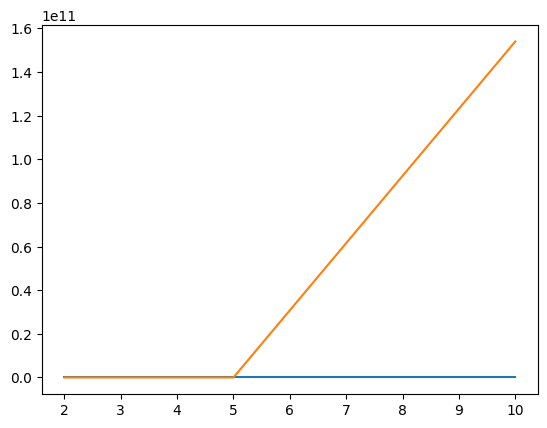

In [ ]:
# Mjesto za Vaš kod
degrees=[2,3,5,10]
mse_train=[mse_train_2,mse_train_3,mse_train_5,mse_train_10]
mse_test=[mse_test_2,mse_test_3,mse_test_5,mse_test_10]

plt.plot(degrees,mse_train)
plt.plot(degrees,mse_test)

Ovaj put uključite interakcijske članove te ponovite treniranje i računanje mjere MSE.

In [ ]:
# Mjesto za Vaš kod
poly_2=pf(2, include_bias=True, interaction_only=True)
X_train_2=poly_2.fit_transform(X_train)
X_test_2=poly_2.fit_transform(X_test)

model = LinearRegression().fit(X_train_2, y_train)

y_train_predicted_2 = model.predict(X_train_2)
mse_train_2=mean_squared_error(y_train, y_train_predicted_2)
print ('MSE na treningu: ', mse_train_2)

y_test_predicted_2 = model.predict(X_test_2)
mse_test_2=mean_squared_error(y_test, y_test_predicted_2)
print('MSE na testu:', mse_test_2)

MSE na treningu:  0.8476116596934249
MSE na testu: 1.0076305070767022


In [ ]:
poly_3=pf(3,include_bias=True, interaction_only=True)
X_train_3=poly_3.fit_transform(X_train)
X_test_3=poly_3.fit_transform(X_test)

model = LinearRegression().fit(X_train_3, y_train)

y_train_predicted_3 = model.predict(X_train_3)
mse_train_3=mean_squared_error(y_train, y_train_predicted_3)
print ('MSE na treningu: ', mse_train_3)

y_test_predicted_3 = model.predict(X_test_3)
mse_test_3=mean_squared_error(y_test, y_test_predicted_3)
print('MSE na testu:', mse_test_3)

MSE na treningu:  0.8282466554598643
MSE na testu: 1.1532864903353244


In [ ]:
poly_5=pf(5,include_bias=True, interaction_only=True)
X_train_5=poly_5.fit_transform(X_train)
X_test_5=poly_5.fit_transform(X_test)

model = LinearRegression().fit(X_train_5, y_train)

y_train_predicted_5 = model.predict(X_train_5)
mse_train_5=mean_squared_error(y_train, y_train_predicted_5)
print ('MSE na treningu: ', mse_train_5)

y_test_predicted_5 = model.predict(X_test_5)
mse_test_5=mean_squared_error(y_test, y_test_predicted_5)
print('MSE na testu:', mse_test_5)

MSE na treningu:  0.8282466554598643
MSE na testu: 1.1532864903353244


In [ ]:
poly_10=pf(10,include_bias=True, interaction_only=True)
X_train_10=poly_10.fit_transform(X_train)
X_test_10=poly_10.fit_transform(X_test)

model = LinearRegression().fit(X_train_10, y_train)

y_train_predicted_10 = model.predict(X_train_10)
mse_train_10=mean_squared_error(y_train, y_train_predicted_10)
print ('MSE na treningu: ', mse_train_10)

y_test_predicted_10 = model.predict(X_test_10)
mse_test_10=mean_squared_error(y_test, y_test_predicted_10)
print('MSE na testu:', mse_test_10)

MSE na treningu:  0.8282466554598643
MSE na testu: 1.1532864903353244


Komentirajte dobivene rezultate. Koji model ima najbolje performanse na podskupu za trening, a koji na testu? Je li za ovaj problem prikladnija polinomijalna regresija od linearne regresije? Imaju li utjecaj interakcijski članovi na performanse modela?

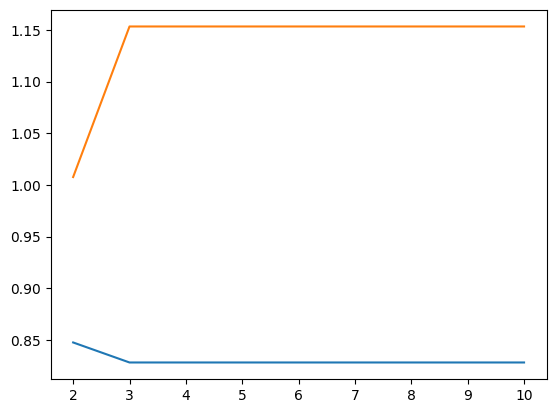

In [ ]:
degrees=[2,3,5,10]
mse_train=[mse_train_2,mse_train_3,mse_train_5,mse_train_10]
mse_test=[mse_test_2,mse_test_3,mse_test_5,mse_test_10]

plt.plot(degrees,mse_train)
plt.plot(degrees,mse_test)

## **Zadatak 3: Preslikavanje u prostor značajki**

Umjesto uvođenja novih (nelinearnih) značajki u model, pokušajte transformirati postojeće značajke. Za početak, za svaku značajku u skupu podataka (TV, Radio, Newspaper), vizualizirajte njezinu vezu s izlaznom varijablom (Sales) pomoću dijagrama raspršenosti. 

In [ ]:
# Mjesto za Vaš kod
plt.scatter(data['TV'], data['sales'], c='purple')
plt.scatter(data['newspaper'], data['sales'], c='pink')
plt.scatter(data['radio'], data['sales'], c='y')
plt.xlabel("Input")
plt.ylabel("Sales")
plt.show()

Na temelju ovih dijagrama, pokušajte zaključiti kakva je veza svake značajke i izlazne varijable. Pokušajte isprobati neke transformacije nad postojećim značajkama za koje mislite da će njihovu vezu nad izlaznom varijablom svesti u linearan oblik (primjerice, potenciranje, korjenovanje, logaritmiranje, ...).

In [ ]:
# Mjesto za Vaš kod
dataframe= data
dataframe['TV'] = np.sqrt(data['TV'])
dataframe['newspaper'] = (data['newspaper'])
dataframe['radio'] = np.sqrt(data['radio'])

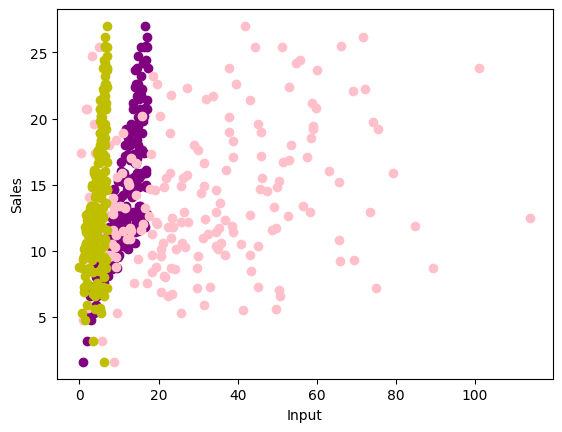

In [ ]:
plt.scatter(dataframe['TV'], data['sales'], c='purple')
plt.scatter(dataframe['newspaper'], data['sales'], c='pink')
plt.scatter(dataframe['radio'], data['sales'], c='y')
plt.xlabel("Input")
plt.ylabel("Sales")
plt.show()

Ponovno vizualizirajte vezu između svake (sada transformirane) značajke i izlazne varijable te provjerite je li došlo do kakvih promjena. Istrenirajte model linearne regresije s takvim značajkama te ga istrenirajte na podskupu za trening. Izračunajte MSE na podskupovima za trening i test. 

In [ ]:
# Mjesto za Vaš kod
X = dataframe.iloc[:, :-1]
y = dataframe.iloc[:, -1]

feature_cols = dataframe.columns[:-1]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

sorted_inds = np.argsort(X_train['TV'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['TV'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

sorted_inds = np.argsort(X_train['radio'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['radio'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

sorted_inds = np.argsort(X_train['newspaper'])
X_train = X_train.iloc[sorted_inds]
y_train = y_train.iloc[sorted_inds]

sorted_inds = np.argsort(X_test['newspaper'])
X_test = X_test.iloc[sorted_inds]
y_test = y_test.iloc[sorted_inds]

model = LinearRegression().fit(X_train, y_train)

y_train_predicted = model.predict(X_train)
print ('MSE na treningu: ', mean_squared_error(y_train, y_train_predicted))

y_test_predicted = model.predict(X_test)
print('MSE na testu:', mean_squared_error(y_test, y_test_predicted))

MSE na treningu:  2.5115260087804097
MSE na testu: 2.5363358515269003


Jeste li uspjeli pronaći neku transformaciju koja poboljšava performanse modela linearne regresije? Prokomentirajte dobivene rezultate.

## **Zadatak 4: Regularizacija**

Kako biste ublažili prenaučenost modela, isprobajte učinak reguralizacije. Testirajte učinak L1 (Lasso) i L2 (Ridge) regularizacije iz biblioteke scikit-learn za gore definirane linearne i nelinearne modele. Možete odabrati najbolji model linearne i najbolji model nelinearne regresije od gore testiranih. Isprobajte nekoliko vrijednosti za parametar $\lambda$. Izračunajte MSE za podskupove za trening i test.


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

ridge = Ridge(alpha=0.01)
ridge.fit(X_train, y_train)
pred_train_ridge= ridge.predict(X_train)
print(mean_squared_error(y_train,pred_train_ridge))


pred_test_ridge= ridge.predict(X_test)
print(mean_squared_error(y_test,pred_test_ridge))

2.5115260135807618
2.5363260961478487


In [ ]:
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge

ridge_2p = Ridge(alpha=0.01)
ridge_2p.fit(X_train_2, y_train)
pred_train_ridge_2p= ridge_2p.predict(X_train_2)
print(mean_squared_error(y_train,pred_train_ridge_2p))


pred_test_ridge= ridge_2p.predict(X_test_2)
print(mean_squared_error(y_test,pred_test_ridge))

0.8476116596937476
1.0076302258612084


In [ ]:
model_lasso = Lasso(alpha=1)
model_lasso.fit(X_train, y_train)

pred_train_lasso= model_lasso.predict(X_train)
print(mean_squared_error(y_train,pred_train_lasso))

pred_test_lasso= model_lasso.predict(X_test)
print(mean_squared_error(y_test,pred_test_lasso))

2.9019193320991703
2.881803909112409


In [ ]:
model_lasso_p = Lasso(alpha=0.1)
model_lasso_p.fit(X_train_2, y_train)

pred_train_lasso_p= model_lasso_p.predict(X_train_2)
print(mean_squared_error(y_train,pred_train_lasso_p))

pred_test_lasso_p= model_lasso_p.predict(X_test_2)
print(mean_squared_error(y_test,pred_test_lasso_p))

0.8483063414868561
0.9941726173410215


Prokomentirajte dobivene rezultate. Ima li uvođenje regularizacije učinak na performanse modela linearne i nelinearne regresije za promatrani problem?

## **Zadatak 5: Drugi algoritmi za regresiju**

U biblioteci scikit-learn postoje brojni drugi algoritmi strojnog učenja koji se mogu koristiti za potrebe regresije. Evaluirajte učinkovitost tih algoritma na promatranom problemu. Trenirajte modele SVR, DecisionTreeRegressor i KNeighborsRegressor sa zadanim postavkama parametara. Usporedite njihove performanse na podskupu za test s performansama gore definiranih modela regresije. Uz mjeru MSE, za usporedbu koristite i mjere RMSE i MAE.

In [ ]:
# Mjesto za Vaš kod

from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, mean_absolute_error
from math import sqrt

svr_model = SVR()
dt_model = DecisionTreeRegressor()
knn_model = KNeighborsRegressor()

svr_model.fit(X_train, y_train)
dt_model.fit(X_train, y_train)
knn_model.fit(X_train, y_train)

svr_preds = svr_model.predict(X_test)
dt_preds = dt_model.predict(X_test)
knn_preds = knn_model.predict(X_test)

svr_mse = mean_squared_error(y_test, svr_preds)
dt_mse = mean_squared_error(y_test, dt_preds)
knn_mse = mean_squared_error(y_test, knn_preds)

svr_rmse = sqrt(svr_mse)
dt_rmse = sqrt(dt_mse)
knn_rmse = sqrt(knn_mse)

svr_mae = mean_absolute_error(y_test, svr_preds)
dt_mae = mean_absolute_error(y_test, dt_preds)
knn_mae = mean_absolute_error(y_test, knn_preds)

print("SVR model:")
print("MSE:", svr_mse)
print("RMSE:", svr_rmse)
print("MAE:", svr_mae)

print("\nDecision Tree model:")
print("MSE:", dt_mse)
print("RMSE:", dt_rmse)
print("MAE:", dt_mae)

print("\nK-Nearest Neighbors model:")
print("MSE:", knn_mse)
print("RMSE:", knn_rmse)
print("MAE:", knn_mae)

SVR model:
MSE: 14.11817570892489
RMSE: 3.757416094728516
MAE: 3.0087410998968633

Decision Tree model:
MSE: 1.8005000000000004
RMSE: 1.3418271125595878
MAE: 1.0016666666666671

K-Nearest Neighbors model:
MSE: 8.470226666666665
RMSE: 2.9103653837047103
MAE: 2.2146666666666666
